In [1]:
import sys
from time import process_time
import matplotlib.pyplot as plt

sys.setrecursionlimit(100_000_000)

In [2]:
n = 20      # games to play
k = 4       # win streak
p = 0.42    # prob of winning

In [3]:
def f(x,y,p,k,buffer):
    if y == 0:
        return 1
    elif x == 0 and y > 0:
        return 0
    elif buffer[x][y] is not None:
        return buffer[x][y]

    buffer[x][y] = p*f(x-1, y-1, p,k, buffer) + (1-p) * f(x-1, k, p,k, buffer)
    return buffer[x][y]

In [4]:
buffer = [[None for j in range(k+1)] for i in range(n+1)]
print(f(n,k,p,k,buffer))

0.2922575722241295


In [5]:
def time_a(x):
    k = x//2
    buffer = [[None for j in range(k+1)] for i in range(x+1)]
    p = 0.99
    start = process_time()
    f(x,k,p,k,buffer)
    end = process_time()
    
    return end - start

In [12]:
n1 = 200
n2 = 100
linear = [n1+x for x in range(0,1900)]
exponential = [2**x * n2 for x in range(5)]

In [13]:
print(linear, exponential)

[200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399,

In [15]:
linear_res = [time_a(x) for x in linear]

In [ ]:
exponential_res = [time_a(x) for x in exponential]

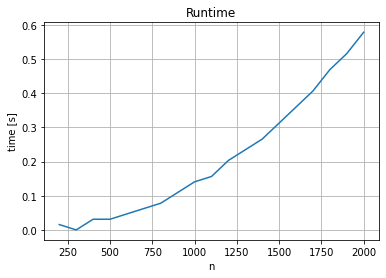

In [21]:
plt.title("Runtime")
plt.plot(range(200,2100,100), [time_a(x) for x in range(200,2100,100)])
#plt.plot(linear, linear_res)
#plt.plot(exponential, exponential_res)
plt.xlabel(r'n')
plt.ylabel(r'time [s]')
plt.grid()
plt.show()

(c) Another recurrence that can be used to solve the problem is to define, for an integer 0 < x < n.


In [40]:
def g(x,k,p,buffer):
    if x < k:
        return 0.0
    elif x == k:
        return p**k
    elif buffer[x] is not None:
        return buffer[x]
        
    buffer[x] = g(x-1,k,p,buffer) + p**k * (1-p) * (1 - g(x-k-1,k,p,buffer))
    return buffer[x]

In [45]:
def time_b(n):
    buffer = [None for x in range(n+1)]
    k = n//2
    p = 0.99

    start = process_time()
    g(n,k,p,buffer)
    end = process_time()

    return end - start

In [ ]:
time_b(5000)

: 

: 

In [ ]:
n1 = 200
n2 = 100
linear = [n1+x for x in range(0,1900)]
exponential = [2**x * n2 for x in range(5)]

In [ ]:
linear_res = [time_b(x) for x in linear]

In [ ]:
exponential_res = [time_b(x) for x in exponential]

In [ ]:
plt.title("Runtime")
plt.plot(range(200,2100,100), [time_a(x) for x in range(200,2100,100)])
#plt.plot(linear, linear_res)
#plt.plot(exponential, exponential_res)
plt.xlabel(r'n')
plt.ylabel(r'time [s]')
plt.grid()
plt.show()